In [31]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats import endpoints
from nba_api.stats.static import teams
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.library.parameters import SeasonAll

In [5]:
nba_teams = teams.get_teams()
team_ids = [team['id'] for team in nba_teams]

In [6]:
from nba_api.stats.endpoints import leaguegamefinder

teams_list = [leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id).get_data_frames()[0] for team_id in team_ids]

In [19]:
from nba_api.stats.static import players
players_list = players.get_players()

In [22]:
print(len(players_list))
print(players_list[6])
player_ids = [player['id'] for player in players_list]

4831
{'id': 76005, 'full_name': 'Tom Abernethy', 'first_name': 'Tom', 'last_name': 'Abernethy', 'is_active': False}


In [16]:
gamelog_bron_all = playergamelog.PlayerGameLog(player_id='2544', season = SeasonAll.all)

df_bron_games_all = gamelog_bron_all.get_data_frames()

In [17]:
df_bron_games_all

[     SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
 0        22022       2544  0022200821  FEB 07, 2023  LAL vs. OKC  L   34   13   
 1        22022       2544  0022200798  FEB 04, 2023    LAL @ NOP  L   40   10   
 2        22022       2544  0022200778  FEB 02, 2023    LAL @ IND  W   33   11   
 3        22022       2544  0022200765  JAN 31, 2023    LAL @ NYK  W   43   11   
 4        22022       2544  0022200749  JAN 28, 2023    LAL @ BOS  L   44   15   
 ...        ...        ...         ...           ...          ... ..  ...  ...   
 1405     22003       2544  0020300068  NOV 07, 2003    CLE @ IND  L   44    8   
 1406     22003       2544  0020300057  NOV 05, 2003  CLE vs. DEN  L   41    3   
 1407     22003       2544  0020300038  NOV 01, 2003    CLE @ POR  L   39    3   
 1408     22003       2544  0020300018  OCT 30, 2003    CLE @ PHX  L   41    8   
 1409     22003       2544  0020300014  OCT 29, 2003    CLE @ SAC  L   42   12   
 
       FGA  FG

In [23]:
# Here we access the leagueleaders module through endpoints & assign the class to "data"
data = endpoints.leagueleaders.LeagueLeaders() 

# Our "data" variable now has built in functions such as creating a dataframe for our data
df = data.league_leaders.get_data_frame()

In [32]:
seasons = [f'{i}-{str(i+1)[2:]}' for i in range(1983,2023)]
leader_list = []
for season in seasons:
    data = endpoints.leagueleaders.LeagueLeaders(season=season)
    leader_list.append(data.league_leaders.get_data_frame())
    time.sleep(.2)

In [43]:
print(type(leader_list[-1]))

<class 'pandas.core.frame.DataFrame'>


In [60]:
top_points_per_season = [leader["PTS"][:30] for leader in leader_list]
avg_top_points_per_season = [np.mean(top_points) for top_points in top_points_per_season]
print(len(top_points_per_season))
print(len(avg_top_points_per_season))

40
40


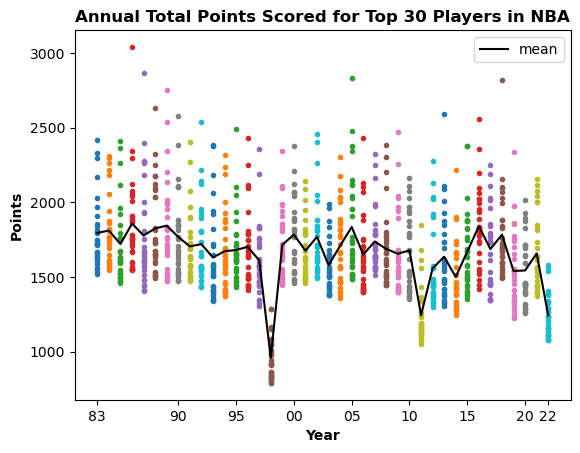

In [79]:
fig, ax = plt.subplots()
for i, top_points in enumerate(top_points_per_season):
    loc_array = [i for _ in range(len(top_points))]
    #ax.plot(top_points, loc_array)
    ax.plot(loc_array, top_points, '.')
ax.plot(avg_top_points_per_season, 'black', label="mean")
ax.set_xlabel("Year", weight="bold")
ax.set_ylabel("Points", weight="bold")
ax.set_title("Annual Total Points Scored for Top 30 Players in NBA", weight="heavy")
ax.legend()
xticks = [83, 90, 95, '00', '05', 10, 15, 20, 22]
xlocs = [0, 7, 12, 17, 22, 27, 32, 37, 39]
plt.xticks(xlocs, xticks)
plt.savefig("annual_total_points")